In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def EulerMilsteinMCStock(scheme, parameters):
    np.random.seed(1000) # always put this line at the beginning of the function if sampling is needed.

    # time setup
    T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    S_0 = parameters['model']['S0']  # initial value
    sigma = parameters['model']['sigma']  # initial value
    rf = parameters['model']['rf']  # initial value    

    # simulation    
    S = np.zeros((numSteps + 1, numPaths),dtype=float)
    S[0,:] = np.log(S_0)
  
    ################         simluations for asset price S              ########
    for i in range(numPaths):  # 0<= i <= numPaths-1
        for t_step in range(1, numSteps+1): # 1<= t <= numSteps, not 0
            # the random number following a standard normal distribution with mean 0 and varaince 1 is sampled
            Zs = np.random.normal(0, 1, 1)                        
            
            if scheme == 'Euler':
                S[t_step,i] = S[t_step-1,i] + (rf-sigma**2/2)*dt + sigma*np.sqrt(dt)*Zs 
            elif scheme == 'Milstein':    
                # Euler and Milstein have the same discretization scheme for Log(S) due to dsigma(t,X)/dX =0
                # dlns = (r-sigma^2/2)dt + sigma*dW
                S[t_step,i] = S[t_step-1,i] + (rf-sigma**2/2)*dt + sigma*np.sqrt(dt)*Zs                                
            
    return np.exp(S)


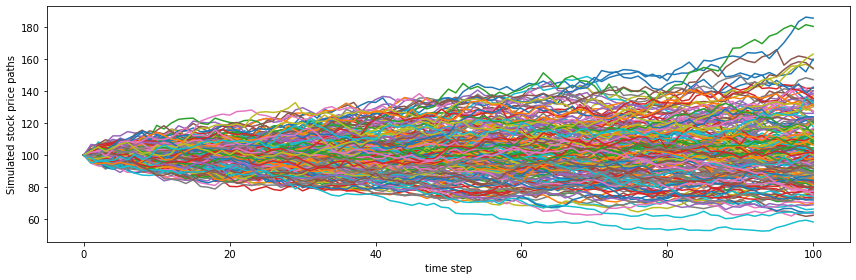

NameError: name 'MC_option_price' is not defined

In [3]:
if __name__=="__main__": # main function
    
    S0 = 100
    sigma = 0.20
    K = 100
    rf = 0.05    
    T = 1     # maturity
    
    # discrete setup
    N = 100  # steps
    dt = T/N
    M = 200
    
    Optype = 1 # 1: call -1: put 

    parameters = {'model':{'S0':S0, 'sigma':sigma, 'rf':rf},                 
                  'asset':{'K':K, 'optype': Optype},
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    
    # Task 1
    # Step1: simulate stock prices
    Sim_S = EulerMilsteinMCStock('Euler', parameters)
    
    plt.figure(figsize=(12, 4))
    plt.plot(Sim_S)
    plt.ylabel('Simulated stock price paths')
    plt.xlabel('time step')    
    plt.tight_layout()
    plt.show()
    #print(pd.DataFrame(Sim_S))  # check    
    #print(Sim_S[-1,:])
    
    #step2:work on payoff
    S_T = Sim_S[-1,:]
    
    #step3: price the option
    MC_price = MC_option_price(S_T, parameters)
    #BS_price = Black_ScholesPrice(parameters)